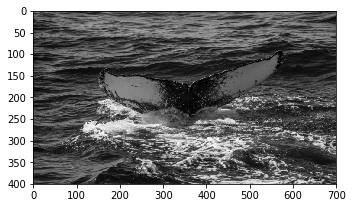

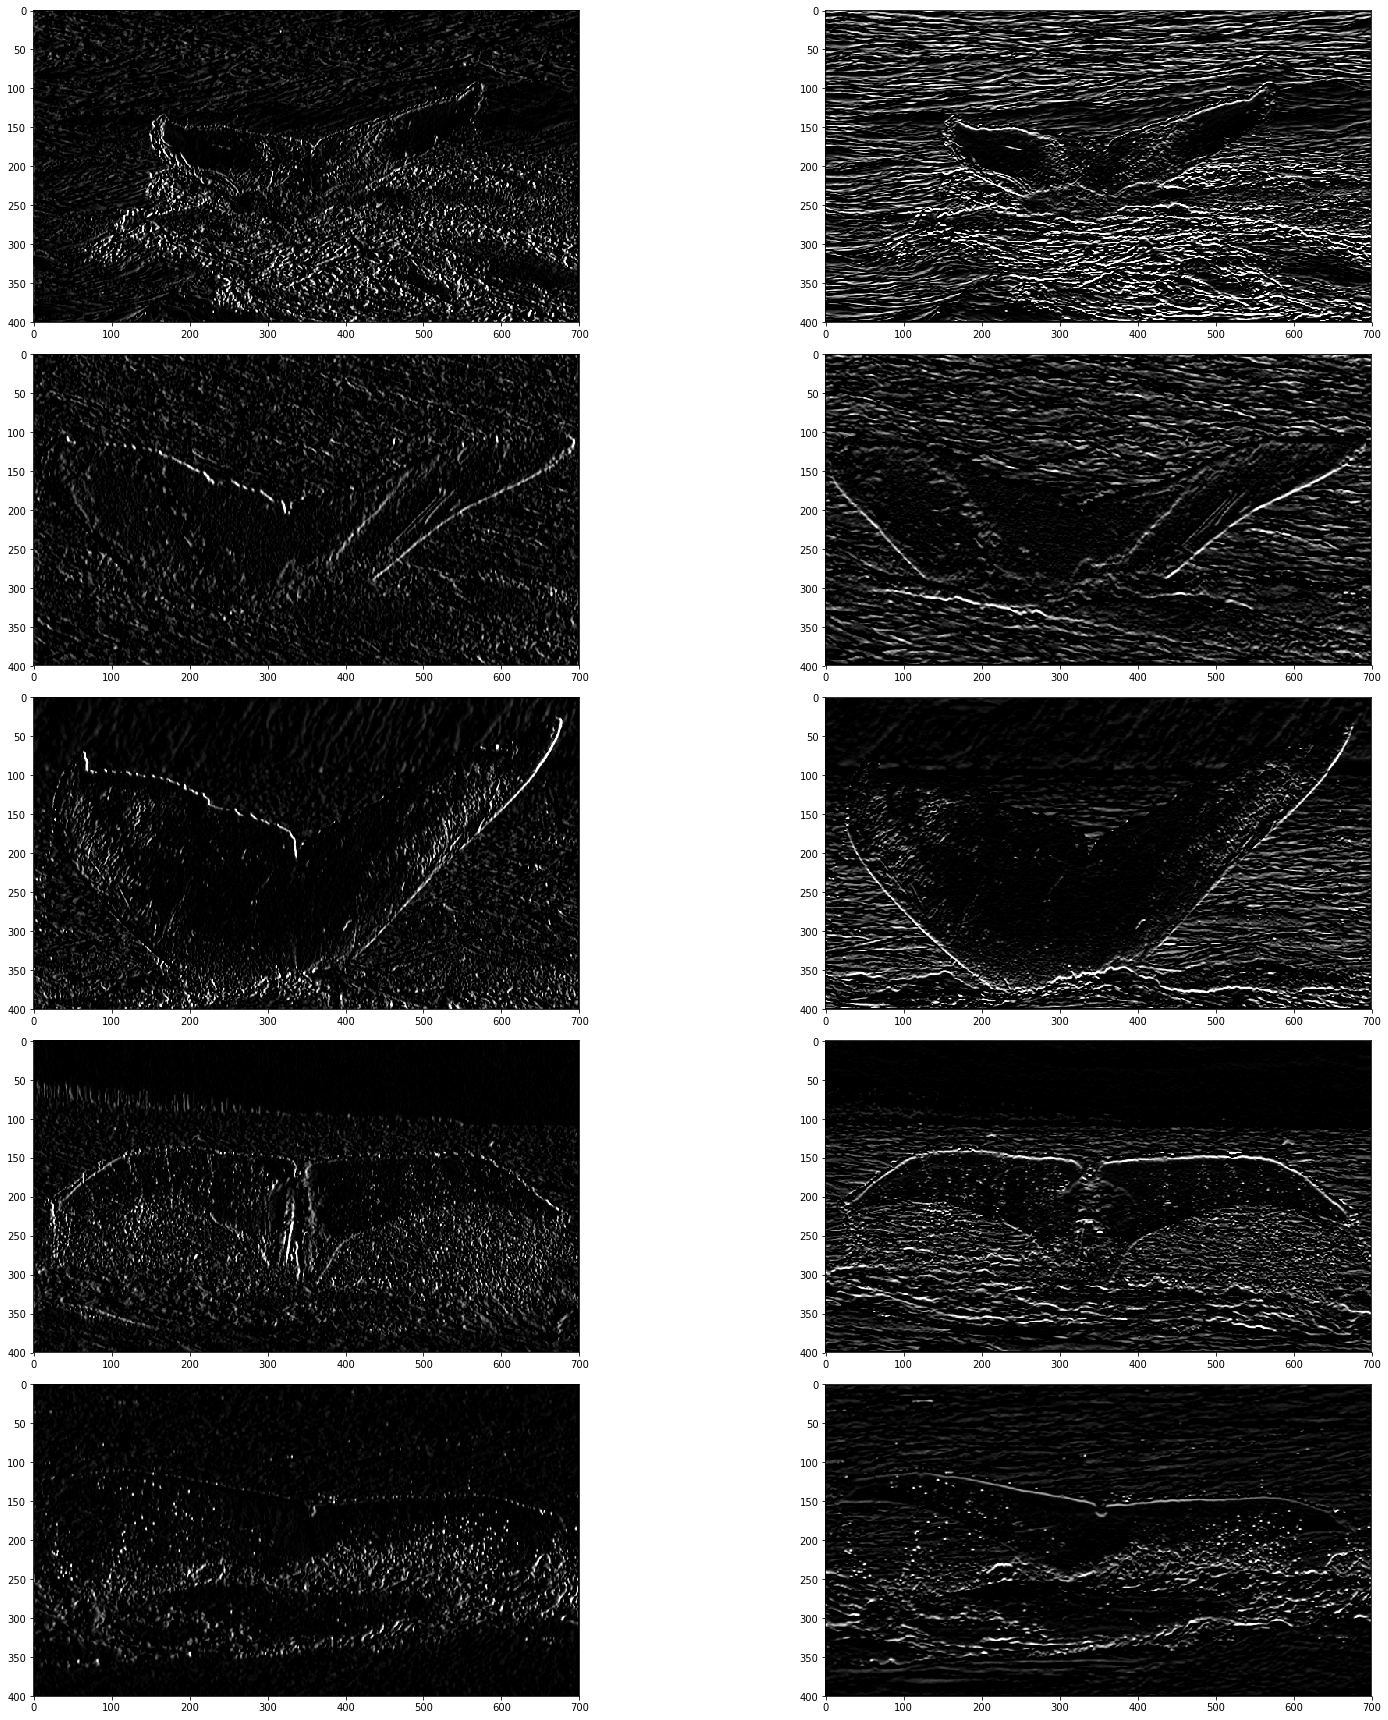

In [60]:
from common import constants
from utils import load_images
from image.operations import Operations

import numpy as np
from matplotlib import pyplot as plt

r_count = 5
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)

filters = np.asarray([
    [
        [1, 0, -1],
        [2, 0, -2], 
        [1, 0, -1]
    ],
    [
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ]
])

n_images = len(images)
n_filters = len(filters)
height = 5*n_images
width = 12*n_filters
figsize = (height, width)


figure, axes = plt.subplots(figsize = (5, 4))
axes.imshow(img, cmap = plt.get_cmap('gray'))
figure.tight_layout()

fltr_figure, fltr_axes = plt.subplots(n_images, n_filters, figsize = figsize)

for col_id, fltr in enumerate(filters):
    for row_id, conv_image in enumerate(Operations.convolve(images, fltr)):
        fltr_axes[row_id, col_id].imshow(conv_image, cmap = plt.get_cmap('gray'))

fltr_figure.tight_layout()

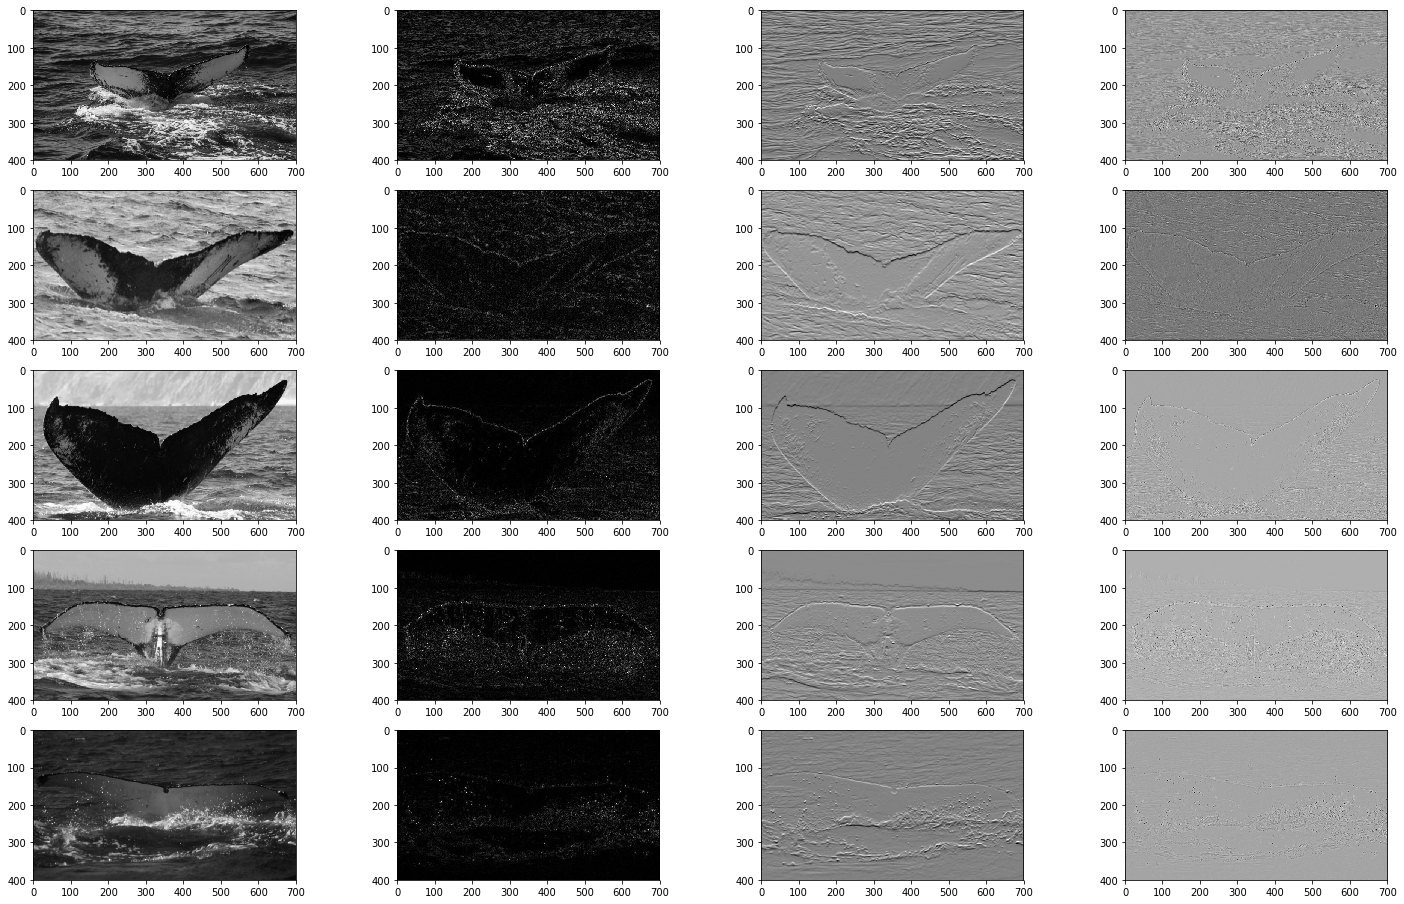

In [66]:
from common import constants
from utils import load_images
from image.operations import Operations

import numpy as np
import cv2
from matplotlib import pyplot as plt

r_count = 5
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)

grid_rows = len(images)
n_filters = 3
grid_cols = n_filters + 1
figsize = (grid_rows*5, grid_cols*4)

figure, axes = plt.subplots(grid_rows, grid_cols, figsize = figsize)

for idx, image in enumerate(images):   
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    
    abs_sobel64f = np.absolute(laplacian)
    sobel_8u = np.uint8(abs_sobel64f)
    
    axes[idx, 0].imshow(image ,cmap = 'gray')
    axes[idx, 1].imshow(sobel_8u ,cmap = 'gray')
    axes[idx, 2].imshow(sobely ,cmap = 'gray')
    axes[idx, 3].imshow(laplacian ,cmap = 'gray')



In [ ]:

import tensorflow as tf

def make_image(tensor):
    """
    Convert an numpy representation image to Image protobuf.
    Copied from https://github.com/lanpa/tensorboard-pytorch/
    """
    from PIL import Image
    height, width, channel = tensor.shape
    image = Image.fromarray(tensor)
    import io
    output = io.BytesIO()
    image.save(output, format='PNG')
    image_string = output.getvalue()
    output.close()
    return tf.Summary.Image(height=height,
                         width=width,
                         colorspace=channel,
                         encoded_image_string=image_string)

class TensorBoardImage(keras.callbacks.Callback):
    def __init__(self, tag):
        super().__init__() 
        self.tag = tag

    def on_epoch_end(self, epoch, logs={}):
        # Load image
        img = data.astronaut()
        # Do something to the image
        img = (255 * skimage.util.random_noise(img)).astype('uint8')

        image = make_image(img)
        summary = tf.Summary(value=[tf.Summary.Value(tag=self.tag, image=image)])
        writer = tf.summary.FileWriter('./logs')
        writer.add_summary(summary, epoch)
        writer.close()

In [ ]:
a = (1, 3)
b = 2, a
print(b)

In [ ]:
#Scratch
#img = imread(locate_train_img("0000e88ab.jpg"))

In [ ]:
print(X_TRAIN.shape)